https://openturns.github.io/openturns/latest/usecases/use_case_wingweight.html

# Projet QI
# Étude du modèle de masse de l’aile de l’avion CESSNA C172 Skyhawk

In [1]:
import openturns as ot
import numpy as np
from openturns.usecases import wingweight_function
import openturns.viewer as viewer
import time

## 1 : Chargement du cas test

###### questions 1, 2, 3, 4

In [2]:
ww = wingweight_function.WingWeightModel()
distribution_entrees = ww.distributionX
nom_sources = distribution_entrees.getDescription()
model_masse = ww.model

##### question 5

In [3]:
model_masse

class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y0] evaluationImplementation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y0] parameter=class=Point name=Unnamed dimension=0 values=[] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=10 values=[1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y0] parameter=class=Point name=Unnamed dimension=0 values=[] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=10 values=[0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y0] parameter=class=Point name=Unnamed dimension=0 values=[]

Donc ce modèle n’a pas été défini à l’aide d’une fonction symbolique, mais d'une fonction python model_masse. On crée nous même la fonction symbolique correspondante g : 

In [4]:
formule = '0.036*Sw^0.758*Wfw^0.0035*(A/cos(Lambda)^2)^0.6*q^0.006*l^0.04*(100*tc/cos(Lambda))^(-0.3)*(Nz*Wdg)^0.49 + Sw*Wp'
g = ot.SymbolicFunction(nom_sources, [formule])

In [14]:
moyenne_entrees = distribution_entrees.getMean()

### comparaison des gradients
print('gradient g : ', g.gradient(moyenne_entrees))
print('gradient model_masse : ', model_masse.gradient(moyenne_entrees))
grad = g.gradient(moyenne_entrees)

gradient g :  10x1
[[    1.1719     ]
 [    0.00347896 ]
 [   19.3828     ]
 [    0          ]
 [    0.0508401  ]
 [   13.7833     ]
 [ -596.394      ]
 [   29.7963     ]
 [    0.060302   ]
 [  175          ]]
gradient model_masse :  10x1
[[    1.1719     ]
 [    0.00347896 ]
 [   19.3828     ]
 [    0          ]
 [    0.0508401  ]
 [   13.7833     ]
 [ -596.394      ]
 [   29.7963     ]
 [    0.060302   ]
 [  175          ]]


In [17]:
##### comparaison des hessiennes
print('hessienne g : ', g.hessian(moyenne_entrees))
print('hessienne model_masse : ', model_masse.hessian(moyenne_entrees))

hessienne g :  10x10x1
sheet #0
[[   -0.00154797     1.50689e-05    0.0839552      0              0.00022021     0.0597015     -2.58324        0.12906        0.000261193    1           ]
 [    1.50689e-05   -1.33338e-05    0.000260922    0              6.84386e-07    0.000185545   -0.00802837     0.000401104    8.11758e-07    0           ]
 [    0.0839552      0.000260922   -0.969139       0              0.00381301     1.03375      -44.7295         2.23472        0.00452265     0           ]
 [    0              0              0            232.593          0              0              0              0              0              0           ]
 [    0.00022021     6.84386e-07    0.00381301     0             -0.00165689     0.00271147    -0.117323       0.00586156     1.18627e-05    0           ]
 [    0.0597015      0.000185545    1.03375        0              0.00271147   -17.6426       -31.8077         1.58914        0.00321611     0           ]
 [   -2.58324       -0.00802837   -44.

Les gradients obtenus sont identiques, contrairement aux matrices hessiennes. Calculons leurs erreurs relatives :

In [41]:
err_relatives = (np.array(g.hessian(moyenne_entrees)) - np.array(model_masse.hessian(moyenne_entrees)))/np.array(model_masse.hessian(moyenne_entrees))
err_relatives = np.reshape(err_relatives, newshape =(10,10))
ot.SymmetricTensor(10, 1, np.ndarray.flatten(err_relatives))

C:\Users\Gatien\AppData\Local\Temp\ipykernel_4832\3416132702.py:1: RuntimeWarning: divide by zero encountered in divide
  err_relatives = (np.array(g.hessian(moyenne_entrees)) - np.array(model_masse.hessian(moyenne_entrees)))/np.array(model_masse.hessian(moyenne_entrees))
C:\Users\Gatien\AppData\Local\Temp\ipykernel_4832\3416132702.py:1: RuntimeWarning: invalid value encountered in divide
  err_relatives = (np.array(g.hessian(moyenne_entrees)) - np.array(model_masse.hessian(moyenne_entrees)))/np.array(model_masse.hessian(moyenne_entrees))


class=SymmetricTensor implementation=class=TensorImplementation name=Unnamed rows=10 columns=10 sheets=1 values=[0.000266382,-0.116352,3.34108e-06,nan,0.00622861,3.87004e-06,3.78893e-07,1.24079e-06,-0.00109478,6.27803e-07,-0.116352,0.172853,0.0033205,nan,-1.48159,0.00434955,8.25262e-05,0.000892772,inf,nan,3.34108e-06,0.0033205,4.04525e-07,nan,6.17501e-05,3.79405e-08,-3.38419e-07,3.37193e-07,-0.000146836,nan,nan,nan,nan,3281.79,nan,nan,nan,nan,nan,nan,0.00622861,-1.48159,6.17501e-05,nan,-5.9357e-05,1.51598e-05,-6.79953e-07,0.000172063,-0.0724859,nan,3.87004e-06,0.00434955,3.79405e-08,nan,1.51598e-05,1.6461e-08,-3.57283e-07,5.35916e-07,5.93496e-05,nan,3.78893e-07,8.25262e-05,-3.38419e-07,nan,-6.79953e-07,-3.57283e-07,-1.49709e-06,-2.82821e-07,8.23479e-07,nan,1.24079e-06,0.000892772,3.37193e-07,nan,0.000172063,5.35916e-07,-2.82821e-07,3.37193e-07,-0.000130008,nan,-0.00109478,inf,-0.000146836,nan,-0.0724859,5.93496e-05,8.23479e-07,-0.000130008,0.0305344,nan,6.27803e-07,nan,nan,nan,nan,nan,nan,nan,nan,nan]

Les 'nan' correspondent à des divisions par 0 lorsque le terme comparé est nul pour les deux matrices hessiennes, il n'y a donc pas d'erreur relative.
On observe en revanche des erreurs relatives assez importantes (allant jusqu'à 1.4 en valeur absolue) sur la deuxième colonne qui correspond aux dérivés en WfW.

##### question 6

In [7]:
taille = 100000
ot.RandomGenerator_SetSeed(1234)

# On échantillonne les entrées
echantillon_entree = distribution_entrees.getSample(taille)

# On mesure le temps pour l'évaluation des fonctions 
start1 = time.time()
echantillon_sortie1 = model_masse(echantillon_entree)
end1 = time.time()
elapsed1 = end1 - start1

#start2 = time.time()
#echantillon_sortie2 = g(echantillon_entree) 
#end2 = time.time()
#elapsed2 = end2 - start2

print(f'Temps d\'exécution model_masse : {elapsed1:.2}ms')
#print(f'Temps d\'exécution g : {elapsed2:.2}ms')

Temps d'exécution model_masse : 0.35ms


In [8]:
##### problème pour évaluer g : probleme de definition de la fonction symbolique ?

## Variables d'entree et de sortie

##### questions 7, 8

In [9]:
X = ot.RandomVector(distribution_entrees)
M = ot.CompositeRandomVector(model_masse, X)

##### question 9

On ne peut pas obtenir la distribution de M grâce à l'algèbre des distributions puisque la variable $\Lambda$ apparaît à deux endroits différents dans la formule.

##### question 10

On sait que la masse de la peinture par unité de surface $Wp$ suit une loi uniforme sur $(0.025,0.08)$ et celle de la surface de l'aile $S_\omega$ une loi uniforme sur $(150,200)$.
Cette fois-ci, on peut appliquer l'algèbre des distributions. Les deux variables étant supposées indépendante, la masse de peinture sur l'aile suit également une loi uniforme dont les bornes sont le produit de celles de $Wp$ et de $S_\omega$, à savoir $(3.75, 16)$.

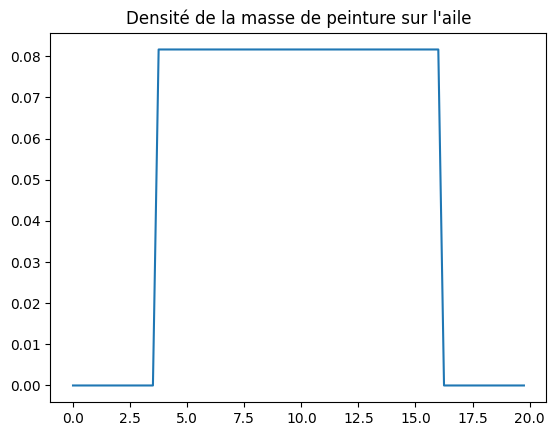

In [51]:
#Tracé de la densité
import matplotlib.pyplot as plt
x = np.arange(0,20,0.25)
y = np.zeros(len(x))
for i in range(len(x)):
    if x[i] >= 3.75 and x[i]<=16:
        y[i] = 1/(16-3.75)
plt.plot(x,y)
plt.title("Densité de la masse de peinture sur l'aile")
plt.show()

## Analyse en tendance centrale

##### questions 11, 12

In [53]:
taylor = ot.TaylorExpansionMoments(M)
print(taylor.getMeanFirstOrder())
print(taylor.getMeanSecondOrder())
print(taylor.getCovariance())

[267.625]
[268.034]
[[ 2195.56 ]]


On obtient une variance de plus de 2000 (soit un écart-type d'environ 47) pour une moyenne de l'ordre de 260, ce qui constitue une grande variabilité de la masse de l'aile.

##### questions 13, 14

[Sw : 0.130315, Wfw : 2.94004e-06, A : 0.228153, Lambda : 0, q : 8.25053e-05, l : 0.00180269, tc : 0.135002, Nz : 0.412794, Wdg : 0.0883317, Wp : 0.00351621]


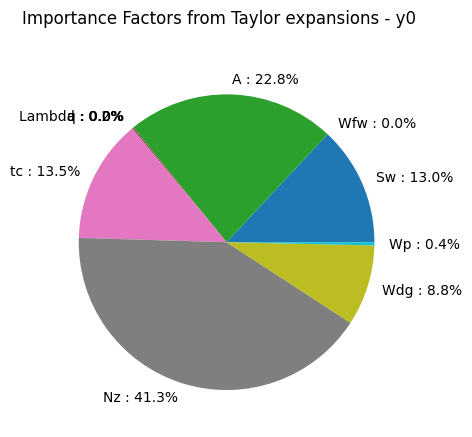

In [11]:
#facteurs d'importance
print(taylor.getImportanceFactors())
graph = taylor.drawImportanceFactors()
view = viewer.View(graph)

On obtient donc que les composantes importantes sont : $Sw, A, tc, Nz, Wdg$
et les composantes négligeables sont : $Wfw, Lambda, q, l, Wp$

##### questions 15, 16

q2= [0.999995]


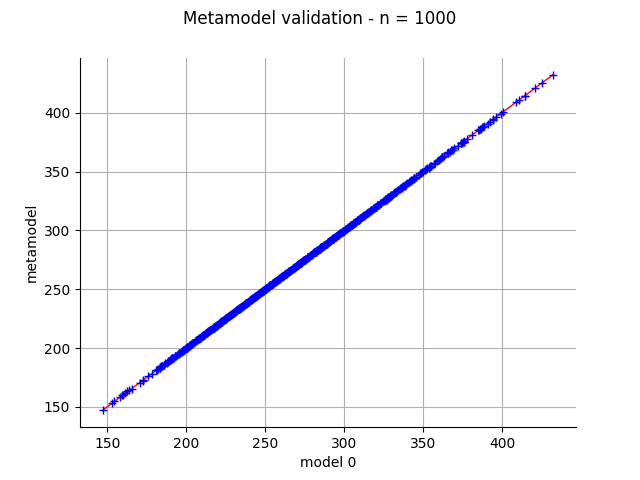

In [55]:
taille = 1000
x_train = ot.MonteCarloExperiment(distribution_entrees, taille).generate()
x_test = ot.MonteCarloExperiment(distribution_entrees, taille).generate()
algo = ot.FunctionalChaosAlgorithm(x_train, model_masse(x_train), distribution_entrees)

algo.run()
result = algo.getResult()
M_approx = result.getMetaModel()
validation = ot.MetaModelValidation(x_test, model_masse(x_test), M_approx)
print("q2=", validation.computePredictivityFactor())
validation.drawValidation()

Graphiquement, la qualité de la décomposition semble bonne, ce que vient confirmer le coefficient de détermination de 0.999995.

##### question 17

In [ ]:
sensitivityAnalysis = ot.FunctionalChaosSobolIndices(result)
print(sensitivityAnalysis)

 input dimension: 10
 output dimension: 1
 basis size: 761
 mean: [268.075]
 std-dev: [48.0823]
------------------------------------------------------------
Index   | Multi-indice                  | Part of variance  
------------------------------------------------------------
      8 | [0,0,0,0,0,0,0,1,0,0]         | 0.410301
      3 | [0,0,1,0,0,0,0,0,0,0]         | 0.220094
      7 | [0,0,0,0,0,0,1,0,0,0]         | 0.138428
      1 | [1,0,0,0,0,0,0,0,0,0]         | 0.124464
      9 | [0,0,0,0,0,0,0,0,1,0]         | 0.0849162
------------------------------------------------------------


------------------------------------------------------------
Component | Sobol index            | Sobol total index      
------------------------------------------------------------
        0 | 0.124473               | 0.127899              
        1 | 2.83311e-06            | 2.9319e-06            
        2 | 0.220245               | 0.226014              
        3 | 0.000489344            | 0.

Les composantes négligeables (contribution inférieure à 0.5%) sont celles d'indice 1,3,4,5 et 9, à savoir Wfw, $\Lambda$, q, l et Wp.  
On obtient le même résultat qu'avec l'approximation de Taylor.

##### questions 18, 19, 20

In [58]:
indices_negligeables = [1,3,4,5,9]
indices_influents = [0,2,6,7,8]
moyenne_entrees = np.array(moyenne_entrees)
model_masse_reduit = ot.ParametricFunction(model_masse, indices_negligeables, moyenne_entrees[indices_negligeables])

x_train_influent = x_train[:, indices_influents]
x_test_influent = x_test[:, indices_influents]

q2= [0.993783]


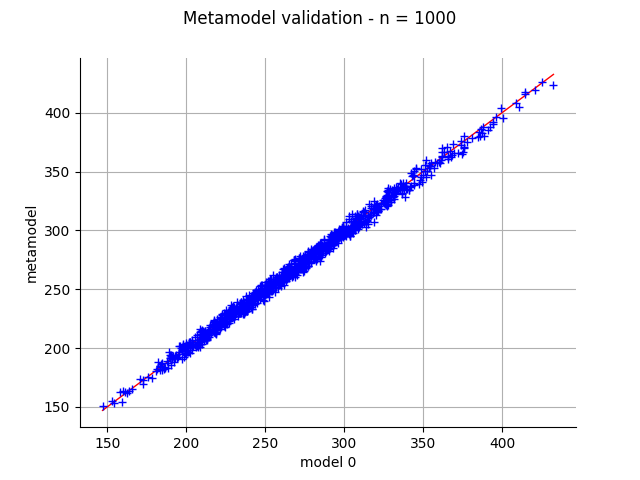

In [63]:
echantillon_sortie_reduit = model_masse_reduit(echantillon_entree[:,indices_influents])

validation = ot.MetaModelValidation(x_test_influent, model_masse(x_test), model_masse_reduit)
print("q2=", validation.computePredictivityFactor())
validation.drawValidation()

Utiliser le modèle réduit comme méta-modèle du modèle initial semble satisfaisant au vu du graphique ci-dessus. Le coefficient de détermination vaut quant à lui 0.993783.

## Analyse d'un évenement rare

##### questions 21, 22

In [60]:
#FORM
Evenement = ot.ThresholdEvent(M, ot.GreaterOrEqual(), 460)
form = ot.FORM(ot.Cobyla(), Evenement, X.getMean())
nEval0 = model_masse.getCallsNumber()
form.run()
resultat_form = form.getResult()
P_form = resultat_form.getEventProbability()
nEval1 = model_masse.getCallsNumber()
nEvalform = nEval1 - nEval0
print("Probabilité FORM=", P_form, "nb. evals=", nEval1 - nEval0)

Probabilité FORM= 0.0005096417254107235 nb. evals= 445


##### question 23

In [ ]:
#SORM
sorm = ot.SORM(ot.Cobyla(), Evenement, X.getMean())
nEval0 = model_masse.getCallsNumber()
sorm.run()
resultat_sorm = sorm.getResult()
P_sorm = resultat_sorm.getEventProbabilityBreitung()
nEval1 = model_masse.getCallsNumber()
print("Probabilité SORM=", P_sorm, "nb. evals=", nEval1 - nEval0)

Probabilité SORM= 8.415973558877229e-05 nb. evals= 686


L'approximation SORM est d'un ordre de grandeur inférieure. Elle est obtenue pour environ le même nombre d'appels à la fonction que pour la méthode FORM.

La forte différence entre les approximations FORM et SORM de la probabilité de l'événement montre le caractère non-linéaire prononcé de la fonction au voisinage de l'événement considéré.

##### question 24

class=PointWithDescription name=Importance Factors dimension=10 description=[Sw,Wfw,A,Lambda,q,l,tc,Nz,Wdg,Wp] values=[0.170144,3.05943e-05,0.195893,5.41536e-10,0.000799383,0.0135064,0.241716,0.219203,0.145448,0.0132602]

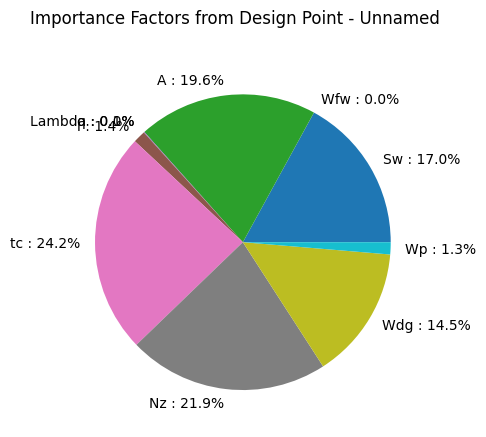

In [ ]:
graph = resultat_form.drawImportanceFactors()
view = viewer.View(graph)
resultat_form.getImportanceFactors()

Les variables négligeables (facteur d'importance inférieur à 0.5%) pour l'approximation FORM sont Wfw, $\Lambda$ et q. Les autres sont influentes. Wp et l sont influentes alors qu'elles ne l'étaient pas avant.

##### question 25

In [61]:
simulation_post_FORM = ot.PostAnalyticalControlledImportanceSampling(resultat_form)
ot.RandomGenerator.SetSeed(0)
simulation_post_FORM.setBlockSize(10) # Pour faire les calculs par blocs de 10
simulation_post_FORM.setMaximumCoefficientOfVariation(0.1)
simulation_post_FORM.setMaximumOuterSampling(100000) 
nEval0 = model_masse.getCallsNumber()
simulation_post_FORM.run()
P_simu_form = simulation_post_FORM.getResult().getProbabilityEstimate()
nEval1 = model_masse.getCallsNumber()
print("Probabilité estimée=", P_simu_form, "nb evals=", nEval1 - nEval0)
print("nombre d'eval calcul FORM + simulation", nEval1 - nEval0 + nEvalform)

Probabilité estimée= 5.2457815485491454e-05 nb evals= 38460
nombre d'eval calcul FORM + simulation 38905


Pour obtenir un coefficient de variation dans l'estimation d'une probabilité de l'ordre de $5.2\,10^{-5}$ il faudrait de l'ordre de $5.2\,10^7$ simulations, ce qui constitue un budget calcul considérable dans un contexte industriel et est nettement supérieur aux ~40000 simulations réalisées ici.

##### question 26

In [64]:
distribution_entrees_reduit = ot.ComposedDistribution([ot.Uniform(150,200), ot.Uniform(6,10), ot.Uniform(0.08,0.18), ot.Uniform(2.5,6), ot.Uniform(1700,2500)])
X_reduit = ot.RandomVector(distribution_entrees_reduit)
M_reduit = ot.CompositeRandomVector(model_masse_reduit, X_reduit)
Evenement_reduit = ot.ThresholdEvent(M_reduit, ot.GreaterOrEqual(), 460)

In [ ]:
#Avec le modèle réduit
#FORM
form = ot.FORM(ot.Cobyla(), Evenement_reduit, X_reduit.getMean())
nEval0 = model_masse_reduit.getCallsNumber()
form.run()
resultat_form = form.getResult()
P_form_reduit = resultat_form.getEventProbability()
nEval1 = model_masse_reduit.getCallsNumber()
nEvalform = nEval1 - nEval0
print("Probabilité FORM=", P_form, "nb. evals=", nEval1 - nEval0)

#SORM
sorm = ot.SORM(ot.Cobyla(), Evenement, X_reduit.getMean())
nEval0 = model_masse_reduit.getCallsNumber()
sorm.run()
resultat_sorm = sorm.getResult()
P_sorm_reduit = resultat_sorm.getEventProbabilityBreitung()
nEval1 = model_masse_reduit.getCallsNumber()
print("Probabilité SORM=", P_sorm, "nb. evals=", nEval1 - nEval0)

resultat_form.getImportanceFactors()

Probabilité FORM= 0.0005096417254107235 nb. evals= 159
Probabilité SORM= 8.415973558877229e-05 nb. evals= 159


class=PointWithDescription name=Importance Factors dimension=5 description=[X0,X1,X2,X3,X4] values=[0.175491,0.201367,0.247493,0.22422,0.151429]

Les probabilités obtenues sont plus faibles bien que du même ordre de grandeur. Remarquons également que toutes les variables sont influentes.
Il y a par ailleurs 3 à 4 fois moins d'évaluations du modèle.

In [ ]:
simulation_post_FORM = ot.PostAnalyticalControlledImportanceSampling(resultat_form)
ot.RandomGenerator.SetSeed(0)
simulation_post_FORM.setBlockSize(10) # Pour faire les calculs par blocs de 100
simulation_post_FORM.setMaximumCoefficientOfVariation(0.1)
simulation_post_FORM.setMaximumOuterSampling(100000) # N'importe quel nombre gigantesque fait l'affaire ici
nEval0 = model_masse.getCallsNumber()
simulation_post_FORM.run()
P_simu_form_reduit = simulation_post_FORM.getResult().getProbabilityEstimate()
nEval1 = model_masse.getCallsNumber()
print("Probabilité estimée=", P_simu_form, "nb evals=", nEval1 - nEval0)
print("nombre d'eval calcul FORM + simultion", nEval1 - nEval0 + nEvalform)

Probabilité estimée= 5.2457815485491454e-05 nb evals= 41790
nombre d'eval calcul FORM + simultion 41949


In [ ]:
print('erreur relative form', np.abs((P_form - P_form_reduit))/P_form)
print('erreur relative sorm', np.abs((P_sorm - P_sorm_reduit))/P_sorm)
print('erreur relative form', np.abs((P_simu_form - P_simu_form_reduit))/P_simu_form)

erreur relative form 0.18276911772749996
erreur relative sorm 0.525698177925736
erreur relative form 0.21399115755862202


Les erreurs relatives sont importantes, en particulier pour l'approximation donnée par SORM. On en déduit que 0.5% est un pourcentage trop elevé pour considérer qu'une variable n'est pas influente dans l'estimation de la probabilité d'un évenement rare comme celui-ci.